In [1]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import scipy.fft as fft
from scipy import signal
from scipy.optimize import curve_fit

In [2]:
def gauss_pdf(x, mu, sigma) :
    """Gaussian"""
    return np.exp( -0.5 * (x-mu)**2 / sigma**2)

def gauss_beam(image, dim, sigma):
    index = np.linspace(0, dim, dim)
    mu = dim/2
    gauss = gauss_pdf(index, mu, sigma)
    
    matrix1 = np.ones((dim, dim)) #array in x dimension
    matrix2 = np.ones((dim, dim)) #array in y dimension
    
    for i in range(dim):
        for j in range(dim):
            matrix1[i,j] = gauss[i]*matrix1[i,j]
    
    for j in range(dim):
        for i in range(dim):
            matrix2[i,j] = gauss[j]*matrix2[i,j]
    
    kernel = matrix1 * matrix2  # use the separability characteristic to make a 2D kernel with 2 1D kernels
    
    return kernel * image  # multiplying kernel with image to blur. 

def Ngauss_pdf(x, N, mu, sigma) :
    """Non-normalized (extended) Gaussian"""
    return N * gauss_pdf(x, mu, sigma)


def Ngauss_pdf_2(x, N, mu, sigma, bkg) :
    """Non-normalized (extended) Gaussian"""
    return N * gauss_pdf(x, mu, sigma)+bkg

def sum_gauss(x, N1, mu1, sigma1, N2, mu2, sigma2):
    gauss1 = Ngauss_pdf(x, N1, mu1, sigma1)
    gauss2 = Ngauss_pdf(x, N2, mu2, sigma2)
    return gauss1 + gauss2
    

## Sample 1

In [131]:
s_dim = 1080                                    # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
a = 2                                           #nm    this is the smallest unit length for our detector
aa = 20 #AA

N = 250                                          # number of particles
radius = 26                                    # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

mSample = np.loadtxt('Samples/Sample1/Sample_1080_250_13.txt')

pixelextentspace = s_dim/2                                              # in units of pixels
pixel_extent = [-pixelextentspace, pixelextentspace, -pixelextentspace, pixelextentspace]

recipspace = np.pi/aa                                              # in units of 'a' [currently AA]
recip_extent = [-np.pi/aa, np.pi/aa, -np.pi/aa, np.pi/aa]

# speckle plot zoom
v1 = 330
v2 = 380
h1 = 470
h2 =610

# correlation plot zoom
cv1 = 39
cv2 = 60
ch1 = 129
ch2 = 150

## Sample 2 

In [173]:
s_dim = 2048                                    # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
a = 2                                           #nm    this is the smallest unit length for our detector
aa = 20 #AA

N = 500                                          # number of particles
radius = 26                                    # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

mSample = np.loadtxt('Samples/Sample2/Sample_2048_500_13.txt')

pixelextentspace = s_dim/2                                              # in units of pixels
pixel_extent = [-pixelextentspace, pixelextentspace, -pixelextentspace, pixelextentspace]

recipspace = np.pi/aa                                              # in units of 'a' [currently AA]
recip_extent = [-np.pi/aa, np.pi/aa, -np.pi/aa, np.pi/aa]

# speckle plot zoom
v1 = 750
v2 = 800
h1 = 900
h2 =1100

# correlation plot zoom
cv1 = 39
cv2 = 60
ch1 = 129
ch2 = 150

## Sample 3 

In [ ]:
s_dim = 2048                                    # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
a = 2                                           #nm    this is the smallest unit length for our detector
aa = 20 #AA

N = 650                                          # number of particles
radius = 26                                    # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

mSample = np.loadtxt('Samples/Sample3/Sample_2048_650_13.txt')

pixelextentspace = s_dim/2                                              # in units of pixels
pixel_extent = [-pixelextentspace, pixelextentspace, -pixelextentspace, pixelextentspace]

recipspace = np.pi/aa                                              # in units of 'a' [currently AA]
recip_extent = [-np.pi/aa, np.pi/aa, -np.pi/aa, np.pi/aa]

## Sample 4 

In [3]:
s_dim = 4096                                    # dimension of the sample matrix
sample_pixel_size = 2 * 10**(-9)                       #m
#sample_pixel_size = 0.0000508 # m  (0.2084/4096)
a = 2                                           #nm    this is the smallest unit length for our detector
#a = 50800 #nm
aa = 20 #AA
#aa = 508000 #AA

N = 1500                                          # number of particles
radius = 26                                    # radius of particle in nm
radius_meters = radius * 10**(-9)                   # radius in meters
radius_pixels = int(radius*10**(-9) / sample_pixel_size)    # radius in pixels

mSample = np.zeros((s_dim,s_dim))               # generating sample matrix
L = 7.8                                           # sample-detector distance in meters

#constants
c = 2.99792458 * 10**8 
wavelength = 1.5 * 10**(-10)                    #m
frequency = c / wavelength

mSample = np.loadtxt('Samples/Sample4/Sample_4096_1500_13.txt')

pixelextentspace = s_dim/2                                              # in units of pixels
pixel_extent = [-pixelextentspace, pixelextentspace, -pixelextentspace, pixelextentspace]

recipspace = np.pi/aa                                              # in units of 'a' [currently AA]
recip_extent = [-np.pi/aa, np.pi/aa, -np.pi/aa, np.pi/aa]

# speckle plot zoom
v1 = 1475
v2 = 1625
h1 = 2112
h2 = 2250

# correlation plot zoom
cv1 = 125
cv2 = 175
ch1 = 240
ch2 = 310

# Gaussian illumination

In [4]:
dim = len(mSample)
sigma = np.linspace(350, 900, 40)
#sigma = [600, 550, 500, 450, 400, 350, 300, 250, 200, 100]

sigma_2d = []
for x in sigma:
    sigma_2d.append(x*np.sqrt(2))

mSample_gauss = []


# Applying the illumination
for i in range(len(sigma)):
    temp = gauss_beam(mSample, dim, sigma[i])
    mSample_gauss.append(temp)


x1 = np.linspace(0, dim, dim)             # x values for gaussian kernel
x2 = np.linspace(-dim/2, dim/2, dim)      # visual axis

y_gauss = []

for i in range(len(sigma)):
    temp_array = np.ones(dim)
    temp_kernel = gauss_pdf(x1, dim/2, sigma[i])   
    temp_gauss = temp_array * temp_kernel          # gaussian from multiplying kernel with matrix of ones
    y_gauss.append(temp_gauss)


In [6]:
#find beamsize

def beam_size(sigma,sample_pixel_size):
    fwhm = 2.355*sigma
    size = fwhm * sample_pixel_size
    return size * 10**6

beam_size(np.array(sigma_2d[:-2]),sample_pixel_size), sigma_2d[:-2]

(array([2.33133106, 2.42526747, 2.51920389, 2.61314031, 2.70707672,
        2.80101314, 2.89494956, 2.98888597, 3.08282239, 3.1767588 ,
        3.27069522, 3.36463164, 3.45856805, 3.55250447, 3.64644088,
        3.7403773 , 3.83431372, 3.92825013, 4.02218655, 4.11612297,
        4.21005938, 4.3039958 , 4.39793221, 4.49186863, 4.58580505,
        4.67974146, 4.77367788, 4.8676143 , 4.96155071, 5.05548713,
        5.14942354, 5.24335996, 5.33729638, 5.43123279, 5.52516921,
        5.61910563, 5.71304204, 5.80697846]),
 [494.9747468305833,
  514.9187842486654,
  534.8628216667474,
  554.8068590848296,
  574.7508965029117,
  594.6949339209939,
  614.638971339076,
  634.583008757158,
  654.5270461752402,
  674.4710835933223,
  694.4151210114044,
  714.3591584294866,
  734.3031958475688,
  754.2472332656506,
  774.1912706837329,
  794.135308101815,
  814.0793455198971,
  834.0233829379791,
  853.9674203560612,
  873.9114577741435,
  893.8554951922255,
  913.7995326103077,
  933.7435700283897

In [6]:
sizee = wavelength * (L) / (beam_size(np.array(sigma_2d[:-2]),sample_pixel_size)[0]*10**(-6))
sizee

0.0005018592259558754

In [69]:
s = (9.434/np.sqrt(2)) * (200*10**(-6))
a = (((7.8 * 12.4) / 9) * 10**(-10) )/s
a

8.054951107856087e-07

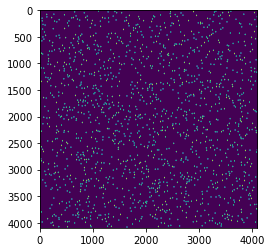

In [70]:
matrix = np.ones((16384,16384))
plt.imshow(mSample)
plt.show()

In [54]:
gmatrix = gauss_beam(matrix, 16384, 4000)

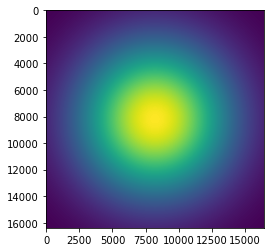

In [55]:
plt.imshow(gmatrix)
plt.show()

In [157]:
temp = gauss_beam(mSample, dim, sigma[i])

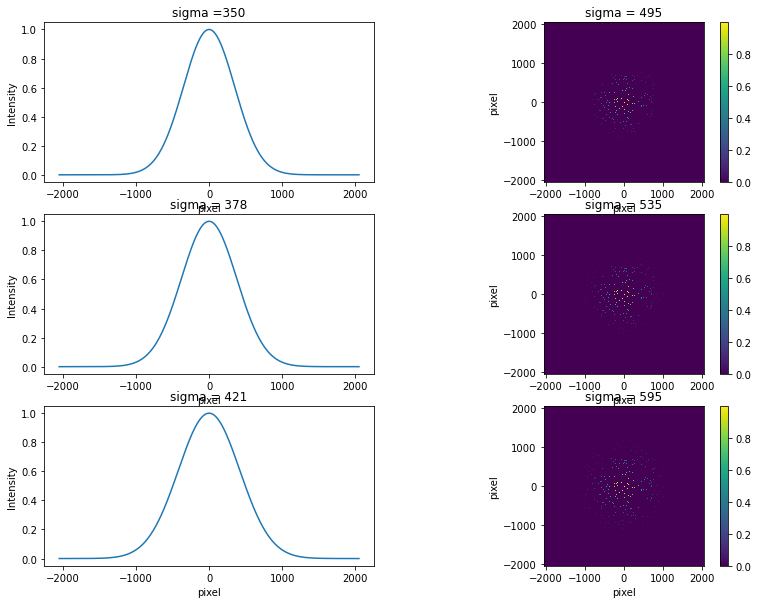

In [7]:
#---Printing---#
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(figsize=(13, 10),ncols=2, nrows=3)

ax1.plot(x2, y_gauss[0])
ax1.set_title(r'sigma ={}' .format(round(sigma[0])))
ax1.set_xlabel(r'pixel')
ax1.set_ylabel('Intensity')

beam1_img = ax2.imshow(mSample_gauss[0],extent= pixel_extent, interpolation='none', cmap=plt.cm.viridis)
ax2.set_title(r'sigma = {}'.format(round(sigma_2d[0])))
ax2.set_xlabel(r'pixel')
ax2.set_ylabel(r'pixel')

ax3.plot(x2, y_gauss[2])
ax3.set_title(r'sigma = {}'.format(round(sigma[2])))
ax3.set_xlabel(r'pixel')
ax3.set_ylabel(r'Intensity')

beam2_img = ax4.imshow(mSample_gauss[2],extent= pixel_extent, interpolation='none', cmap=plt.cm.viridis)
ax4.set_title(r'sigma = {}'.format(round(sigma_2d[2])))
ax4.set_xlabel(r'pixel')
ax4.set_ylabel(r'pixel')

ax5.plot(x2, y_gauss[5])
ax5.set_title(r'sigma = {}'.format(round(sigma[5])))
ax5.set_xlabel(r'pixel')
ax5.set_ylabel(r'Intensity')

beam3_img = ax6.imshow(mSample_gauss[5],extent= pixel_extent, interpolation='none', cmap=plt.cm.viridis)
ax6.set_title(r'sigma = {}'.format(round(sigma_2d[5])))
ax6.set_xlabel(r'pixel')
ax6.set_ylabel(r'pixel')

fig.colorbar(beam1_img, ax=ax2)
fig.colorbar(beam2_img, ax=ax4)
fig.colorbar(beam3_img, ax=ax6)

# FFT

In [7]:
full_beam = np.abs(fft.fftshift(fft.fft2(mSample)))**2       # full beam
full_beam_log = np.log(full_beam)

sigma_beam = []
sigma_beam_log = []
for i in range(len(sigma)):
    sigma_beam_temp =  np.abs(fft.fftshift(fft.fft2(mSample_gauss[i])))**2
    sigma_beam.append(sigma_beam_temp)
    #---log the intensity scale to see contours better---#
    sb_log_temp = np.log(sigma_beam_temp)
    sigma_beam_log.append(sb_log_temp)

    

#sigma1_beam = np.abs(fft.fftshift(fft.fft2(mSample_gauss1)))**2 # sigma attenuated beam size

#sigma2_beam = np.abs(fft.fftshift(fft.fft2(mSample_gauss2)))**2 # sigma attenuated smaller beam size

#sigma3_beam = np.abs(fft.fftshift(fft.fft2(mSample_gauss3)))**2 # sigma attenuated smaller beam size

#---log the intensity scale to see contours better---#
#sigma1_beam_log = np.log(sigma1_beam)
#sigma2_beam_log = np.log(sigma2_beam)
#sigma3_beam_log = np.log(sigma3_beam)

<ipython-input-7-6e9d671bdf54>:2: RuntimeWarning: divide by zero encountered in log
  full_beam_log = np.log(full_beam)


In [8]:
q_x = np.linspace(recip_extent[0],recip_extent[1], dim)
q_y = np.linspace(recip_extent[2],recip_extent[3], dim)

lower = 0.007
upper = 0.014

mask_x = (q_x >= lower) & (q_x <= upper)
mask_y = (q_y >= lower) & (q_y <= upper)

ay = np.where(mask_y)[0]; ax = np.where(mask_x)[0]
v1 = dim - ay.max(); v2 = dim - min(ay); h1 = min(ax) ; h2 = ax.max()


In [9]:
q2_x = np.linspace(recip_extent[0],recip_extent[1], dim)
q2_y = np.linspace(recip_extent[2],recip_extent[3], dim)

lower2 = 0.014
upper2 = 0.021

mask_x2 = (q2_x >= lower2) & (q2_x <= upper2)
mask_y2 = (q2_y >= lower2) & (q2_y <= upper2)

ay2 = np.where(mask_y2)[0]; ax2 = np.where(mask_x2)[0]
vv1 = dim - ay2.max(); vv2 = dim - min(ay2); hh1 = min(ax2) ; hh2 = ax2.max()

In [10]:
[q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]]

[0.007019675892636551,
 0.013924275131295433,
 0.007019675892636551,
 0.013924275131295433]

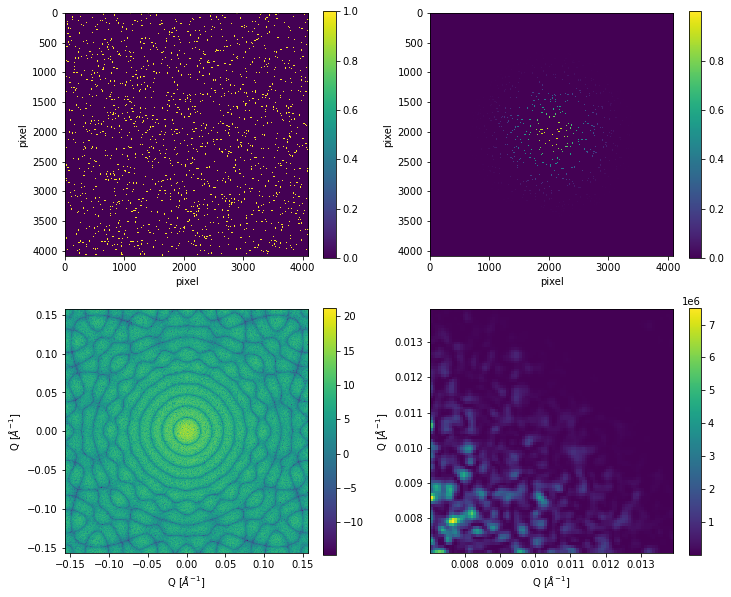

In [11]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(figsize=(12, 10), ncols=2, nrows=2)

im1 = ax1.imshow(mSample, interpolation='none', cmap=plt.cm.viridis)
im2 = ax2.imshow(mSample_gauss[5], interpolation='none', cmap=plt.cm.viridis)
im3 = ax3.imshow(sigma_beam_log[5], extent = recip_extent, interpolation='none', cmap=plt.cm.viridis)
im4 = ax4.imshow(sigma_beam[5][v1:v2, h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)

ax1.set_xlabel(r'pixel')
ax1.set_ylabel(r'pixel')
ax2.set_xlabel(r'pixel')
ax2.set_ylabel(r'pixel')
fig.colorbar(im1, ax = ax1, orientation='vertical')
fig.colorbar(im2, ax = ax2, orientation='vertical')
fig.colorbar(im3, ax = ax3, orientation='vertical')
fig.colorbar(im4, ax=ax4)
ax3.set_xlabel(r'Q [$\AA^{-1}$]')
ax3.set_ylabel(r'Q [$\AA^{-1}$]')
ax4.set_xlabel(r'Q [$\AA^{-1}$]')
ax4.set_ylabel(r'Q [$\AA^{-1}$]')

plt.savefig('sim_plot_example.png')

<IPython.core.display.Javascript object>


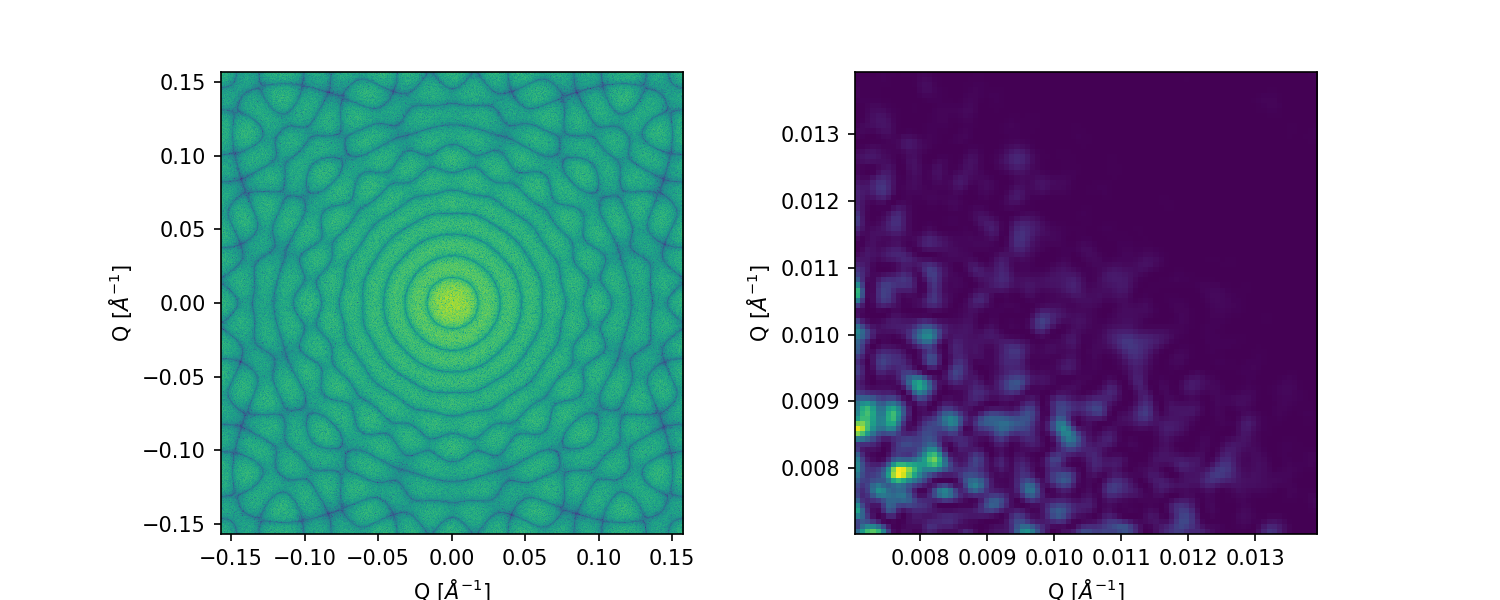

In [442]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)

ax1.imshow(sigma_beam_log[5], extent = recip_extent, interpolation='none', cmap=plt.cm.viridis)
ax2.imshow(sigma_beam[5][v1:v2, h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)

ax1.set_xlabel(r'Q [$\AA^{-1}$]')
ax1.set_ylabel(r'Q [$\AA^{-1}$]')
ax2.set_xlabel(r'Q [$\AA^{-1}$]')
ax2.set_ylabel(r'Q [$\AA^{-1}$]')

plt.savefig('sim_speckle_zoom.png')

# Scattering factor

## Correlation 

In [12]:
# Boundary condition is pad input arrays with fillvalue. 
# Mode is the full discrete linear cross-correlation of the inputs

corr = []
for i in range(len(sigma)):
    corr_temp = signal.correlate2d(sigma_beam[i][v1:v2,h1:h2], sigma_beam[i][v1:v2,h1:h2], mode='full', boundary='fill', fillvalue=0)
    corr.append(corr_temp)
    

corr0 = signal.correlate2d(full_beam[v1:v2,h1:h2], full_beam[v1:v2,h1:h2], mode='full', boundary='fill', fillvalue=0)


In [5]:
# Boundary condition is pad input arrays with fillvalue. 
# Mode is the full discrete linear cross-correlation of the inputs

corr2 = []
for i in range(len(sigma)):
    corr_temp = signal.correlate2d(sigma_beam[i][vv1:vv2,hh1:hh2], sigma_beam[i][vv1:vv2,hh1:hh2], mode='full', boundary='fill', fillvalue=0)
    corr2.append(corr_temp)
    

corr20 = signal.correlate2d(full_beam[vv1:vv2,hh1:hh2], full_beam[vv1:vv2,hh1:hh2], mode='full', boundary='fill', fillvalue=0)


NameError: name 'sigma_beam' is not defined

<IPython.core.display.Javascript object>


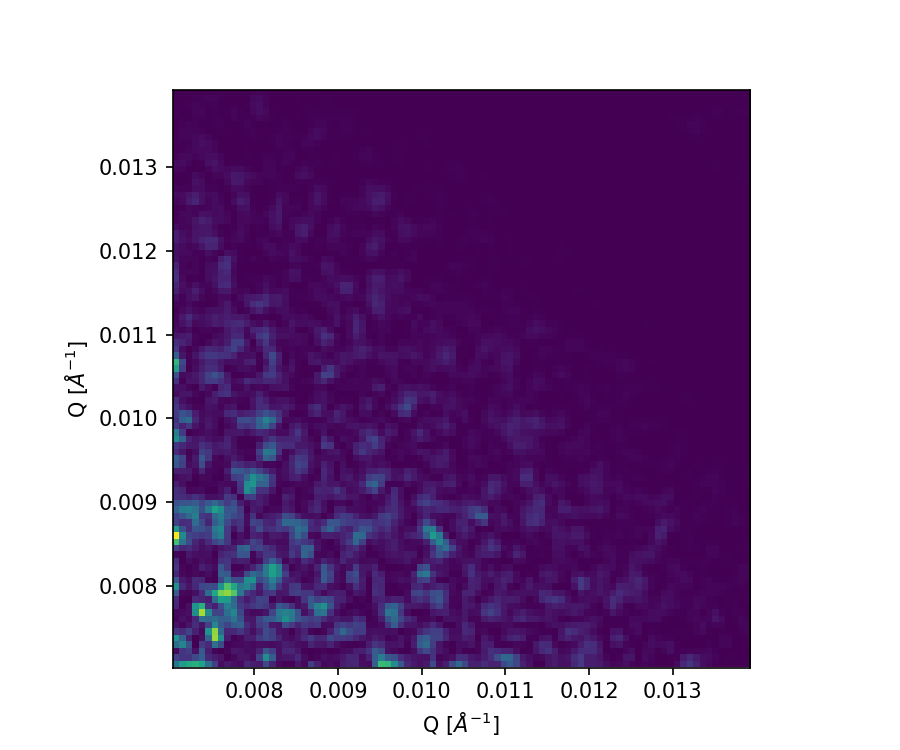

In [452]:
fig, (ax1) = plt.subplots(figsize=(6,5), ncols=1)

ax1.imshow(sigma_beam[0][v1:v2, h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)

ax1.set_xlabel(r'Q [$\AA^{-1}$]')
ax1.set_ylabel(r'Q [$\AA^{-1}$]')

plt.savefig('sim-speckle-zoom.png')

<IPython.core.display.Javascript object>


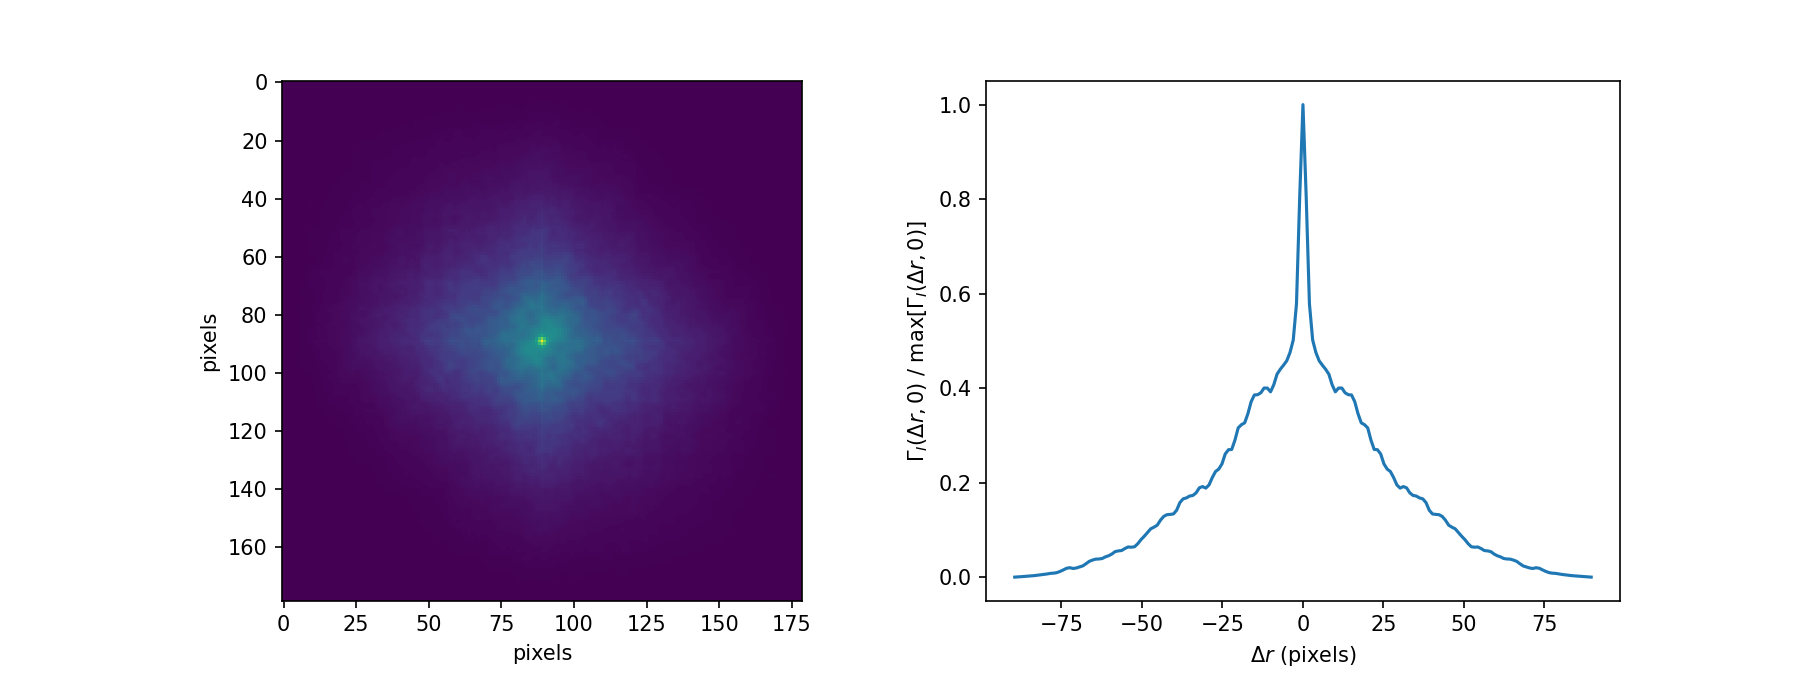

In [464]:
fig, (ax1, ax2) = plt.subplots(figsize=(12, 4.5), ncols=2)

ax1.imshow(corr[0], interpolation='none', cmap=plt.cm.viridis)
ax2.plot(x_v, y_cfit_bkg[0], label=r'$\sigma$ = {}'.format(round(sigma_2d[0])))

ax1.set_xlabel(r'pixels')
ax1.set_ylabel(r'pixels')
ax2.set_xlabel(r'$\Delta r$ (pixels)')
ax2.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$]')

plt.savefig('sim_autocorr_example.png')

In [465]:
sigma_2d

[848.5281374238571,
 777.8174593052023,
 707.1067811865476,
 636.3961030678928,
 565.685424949238,
 494.9747468305833,
 424.26406871192853,
 353.5533905932738,
 282.842712474619,
 141.4213562373095]

<IPython.core.display.Javascript object>


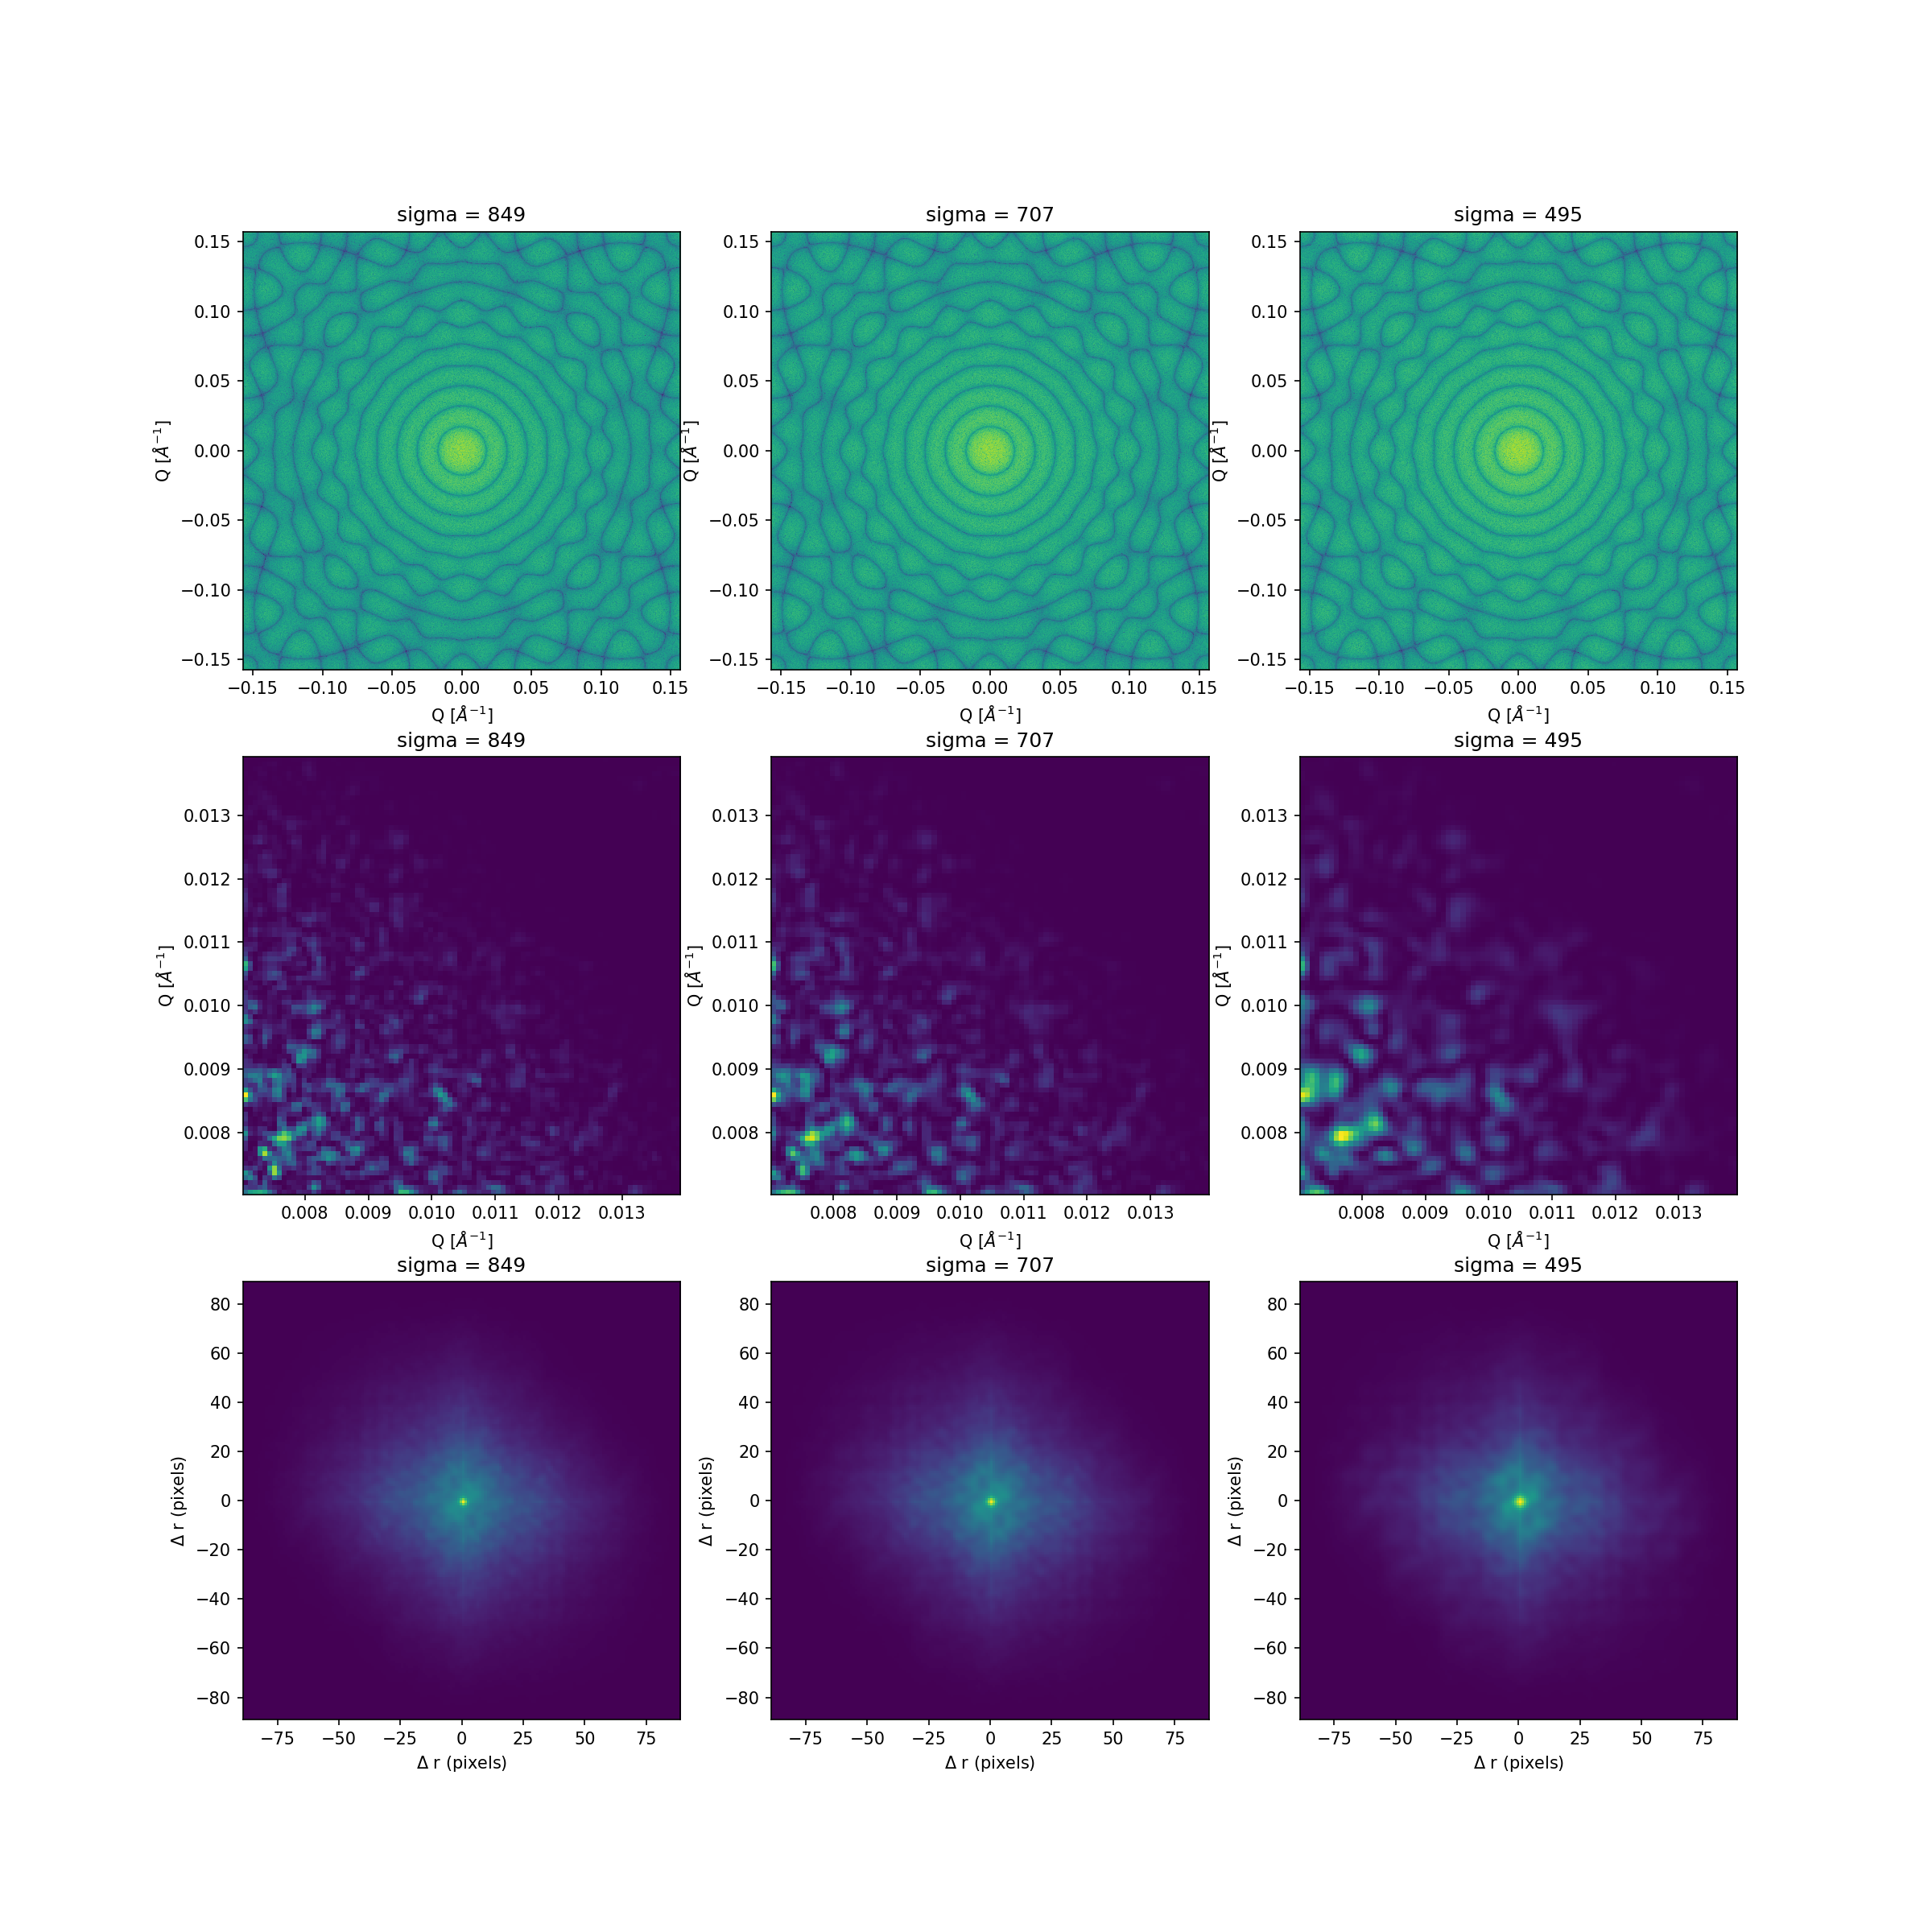

Text(0, 0.5, '$\\Delta$ r (pixels)')

In [316]:
#---Printing---#
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(figsize=(16, 16) ,ncols=3, nrows=3)

# FT 
#full_beam_log_img = ax1.imshow(full_beam_log,extent= pixel_extent, interpolation='none', cmap=plt.cm.viridis)
sigma1_beam_log_img = ax1.imshow(sigma_beam_log[0], extent = recip_extent, interpolation='none', cmap=plt.cm.viridis)
sigma2_beam_log_img = ax2.imshow(sigma_beam_log[2], extent = recip_extent, interpolation='none', cmap=plt.cm.viridis)
sigma3_beam_log_img = ax3.imshow(sigma_beam_log[5], extent = recip_extent, interpolation='none', cmap=plt.cm.viridis)

#fig.colorbar(full_beam_log_img, ax=ax1)
#fig.colorbar(sigma1_beam_log_img, ax=ax1)
#fig.colorbar(sigma2_beam_log_img, ax=ax2)
#fig.colorbar(sigma3_beam_log_img, ax=ax3)

#ax1.set_title(r'full illumination')
ax1.set_title(r'sigma = {}'.format(round(sigma_2d[0])))
ax1.set_xlabel(r'Q [$\AA^{-1}$]')
ax1.set_ylabel('Q [$\AA^{-1}$]')

ax2.set_title(r'sigma = {}'.format(round(sigma_2d[2])))
ax2.set_xlabel(r'Q [$\AA^{-1}$]')
ax2.set_ylabel(r'Q [$\AA^{-1}$]')

ax3.set_title(r'sigma = {}'.format(round(sigma_2d[5])))
ax3.set_xlabel(r'Q [$\AA^{-1}$]')
ax3.set_ylabel(r'Q [$\AA^{-1}$]')

# FT zoom

#full_beam_log_img = ax4.imshow(full_beam_log[v1:v2,h1:h2],extent= [h1,h2,v1,v2], interpolation='none', cmap=plt.cm.viridis)
sigma1_beam_log_img = ax4.imshow(sigma_beam[0][v1:v2,h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)
sigma2_beam_log_img = ax5.imshow(sigma_beam[2][v1:v2,h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)
sigma3_beam_log_img = ax6.imshow(sigma_beam[5][v1:v2,h1:h2], extent = [q_x[h1], q_x[h2],q_y[min(ay)], q_y[ay.max()]], interpolation='none', cmap=plt.cm.viridis)

#ax4.set_title(r'full illumination')
ax4.set_title(r'sigma = {}'.format(round(sigma_2d[0])))
ax4.set_xlabel(r'Q [$\AA^{-1}$]')
ax4.set_ylabel(r'Q [$\AA^{-1}$]')

ax5.set_title(r'sigma = {}'.format(round(sigma_2d[2])))
ax5.set_xlabel(r'Q [$\AA^{-1}$]')
ax5.set_ylabel(r'Q [$\AA^{-1}$]')

ax6.set_title(r'sigma = {}'.format(round(sigma_2d[5])))
ax6.set_xlabel(r'Q [$\AA^{-1}$]')
ax6.set_ylabel(r'Q [$\AA^{-1}$]')

# correlation

#corr0_img = ax7.imshow(corr0[cv1:cv2,ch1:ch2], interpolation='none', cmap=plt.cm.viridis)
#corr1_img = ax8.imshow(corr1[cv1:cv2,ch1:ch2], interpolation='none', cmap=plt.cm.viridis)
#corr2_img = ax9.imshow(corr2[cv1:cv2,ch1:ch2], interpolation='none', cmap=plt.cm.viridis)

#corr0_img = ax7.imshow(corr0, interpolation='none', cmap=plt.cm.viridis)
corr1_img = ax7.imshow(corr[0][cv1:cv2,ch1:ch2], extent = [- (len(corr[0][cv1:cv2,ch1:ch2][0])/2), (len(corr[0][cv1:cv2,ch1:ch2][0])/2), -(len(corr[0][cv1:cv2,ch1:ch2][1])/2), (len(corr[0][cv1:cv2,ch1:ch2][1])/2)], interpolation='none', cmap=plt.cm.viridis)
corr2_img = ax8.imshow(corr[2][cv1:cv2,ch1:ch2], extent = [- (len(corr[0][cv1:cv2,ch1:ch2][0])/2), (len(corr[0][cv1:cv2,ch1:ch2][0])/2), -(len(corr[0][cv1:cv2,ch1:ch2][1])/2), (len(corr[0][cv1:cv2,ch1:ch2][1])/2)], interpolation='none', cmap=plt.cm.viridis)
corr3_img = ax9.imshow(corr[5][cv1:cv2,ch1:ch2], extent = [- (len(corr[0][cv1:cv2,ch1:ch2][0])/2), (len(corr[0][cv1:cv2,ch1:ch2][0])/2), -(len(corr[0][cv1:cv2,ch1:ch2][1])/2), (len(corr[0][cv1:cv2,ch1:ch2][1])/2)], interpolation='none', cmap=plt.cm.viridis)

#fig.colorbar(corr0_img, ax=ax7)
#fig.colorbar(corr1_img, ax=ax8)
#fig.colorbar(corr2_img, ax=ax9)

#ax7.set_title(r'full illumination')
ax7.set_title(r'sigma = {}'.format(round(sigma_2d[0])))
ax7.set_xlabel(r'$\Delta$ r (pixels)')
ax7.set_ylabel(r'$\Delta$ r (pixels)')

ax8.set_title(r'sigma = {}'.format(round(sigma_2d[2])))
ax8.set_xlabel(r'$\Delta$ r (pixels)')
ax8.set_ylabel(r'$\Delta$ r (pixels)')

ax9.set_title(r'sigma = {}'.format(round(sigma_2d[5])))
ax9.set_xlabel(r'$\Delta$ r (pixels)')
ax9.set_ylabel(r'$\Delta$ r (pixels)')

# Plot and Look at data

In [15]:
# fit background subtraction gaussian.
# this is done by fitting the background gaussian of the full beam correlation. 

# create x-axis for vertical correlation analysis
t_v = int(np.argmax(corr[0][int(len(corr[0][:,0])/2),:]))     # finds middle column index (vertical up/down line)
x_v = np.linspace(-len(corr[0][:,t_v])/2,len(corr[0][:,t_v])/2,len(corr[0][:,t_v])) 
y_fullbeam = corr0[:,t_v]/int(np.floor(max(corr0[:,t_v])))

init_vals = [0.5,len(x_v)/2, 50]  # N, mu, sigma
bkg_fit, pcov1 = curve_fit(Ngauss_pdf, x_v, y_fullbeam, p0=init_vals)

y_cfit = []
for corri in corr:
    cfit_temp = corri[:,t_v]/int(np.floor(max(corri[:,t_v]))) - Ngauss_pdf(x_v, *bkg_fit)
    y_cfit.append(cfit_temp)
    
y_cfit_bkg = []
for corri in corr:
    cfit_temp = corri[:,t_v]/int(np.floor(max(corri[:,t_v])))
    y_cfit_bkg.append(cfit_temp)
    
# normalise new subtracted data
y_cfit_norm = []
for y in y_cfit:
    print(max(y))
    cfit_temp = y/max(y)
    y_cfit_norm.append(cfit_temp)

0.5561732632157228
0.556173263215723
0.556173263215723
0.556173263215723
0.5561732632157228
0.556173263215723
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228
0.5561732632157228


In [12]:
plt.rcParams.update({'font.size': 12})

In [13]:
# fit background subtraction gaussian.
# this is done by fitting the background gaussian of the full beam correlation. 

# create x-axis for vertical correlation analysis
t2_v = int(np.argmax(corr[0][int(len(corr2[0][:,0])/2),:]))     # finds middle column index (vertical up/down line)
x2_v = np.linspace(-len(corr2[0][:,t2_v])/2,len(corr2[0][:,t2_v])/2,len(corr2[0][:,t2_v])) 
y2_fullbeam = corr0[:,t2_v]/int(np.floor(max(corr0[:,t2_v])))

#init_vals2 = [0.5,len(x2_v)/2, 50]  # N, mu, sigma
#bkg_fit2, pcov12 = curve_fit(Ngauss_pdf, x2_v, y2_fullbeam, p0=init_vals)

y2_cfit = []
for corri in corr2:
    cfit_temp = corri[:,t2_v]/int(np.floor(max(corri[:,t2_v])))
    y2_cfit.append(cfit_temp)

NameError: name 'corr2' is not defined

NameError: name 'x2_v' is not defined

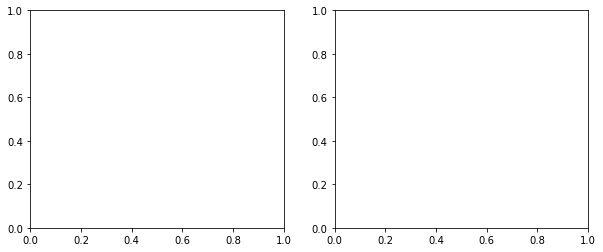

In [16]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)

for i in range(len(y_cfit) - 6):
    ax1.plot(x2_v[75:105], y2_cfit[i][75:105], label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))
    

for i in range(len(y_cfit) - 6):
    ax2.plot(x_v[75:105], y_cfit[i][75:105], label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))

ax1.set_xlabel(r'$\Delta$ r (pixels)')
ax1.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$] ')
ax2.set_xlabel(r'$\Delta$ r (pixels)')
ax2.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$]')

ax1.legend()
ax2.legend()

NameError: name 'y_cfit' is not defined

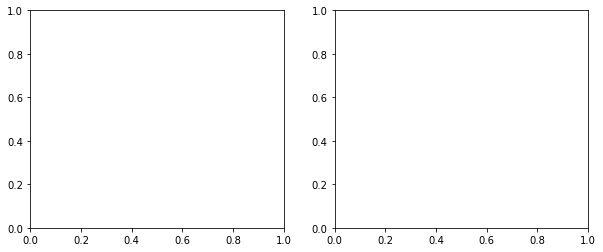

In [14]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 4), ncols=2)

for i in range(len(y_cfit) - 2):
    ax1.plot(x_v, y_cfit_norm[i], label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))
    

for i in range(len(y_cfit) - 2):
    ax2.plot(x_v[75:105], y_cfit_norm[i][75:105], label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))

ax1.set_xlabel(r'$\Delta$ r (pixels)')
ax1.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$]')
ax2.set_xlabel(r'$\Delta$ r (pixels)')
ax2.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$]')

ax1.legend()
ax2.legend()
plt.savefig('sim_autocorr_ycut.png')

## Normalised 

In [409]:
len(y_cfit[0])

179

# Fit data

In [17]:
# make initial guesses: N, mu, sigma

init_vals = []
for i in range(len(sigma)):
    r = np.linspace(2.5, 8, len(sigma))
    temp =[0, r[i] ]
    init_vals.append(temp)

# list to save fit parameters
parameters = []
cpara = []

for i in range(len(sigma)):
    p_temp, c_temp = curve_fit(gauss_pdf, x_v[75:105], y_cfit_norm[i][75:105], p0=init_vals[i])
    parameters.append(p_temp)
    cpara.append(c_temp)

perr = []
for i in range(len(sigma)):
    temp = np.sqrt(np.diag(cpara[i])[1])
    perr.append(temp)


In [18]:
#xlim = (180 - 120)/2
parameters
z1 = 85
z2 = 95

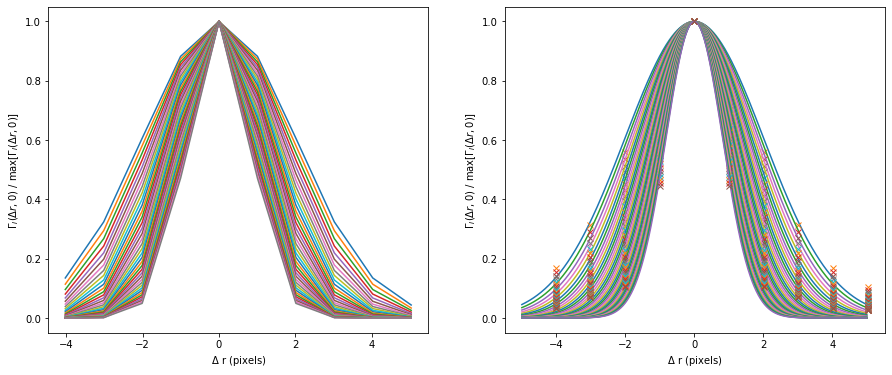

In [19]:
from itertools import cycle

fig, (ax1, ax2) = plt.subplots(figsize=(15, 6), ncols=2)

x_fit = np.linspace(-5, 5,1000)
corr_position = np.linspace(-len(x_fit/2),len(x_fit/2), 1000)
colours = ['tab:blue','tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:cyan', 'tab:pink', 'tab:grey', 'tab:olive', 'blue', 'black']

# fit only
for i in range(len(y_cfit_norm) - 2):
    ax1.plot(x_v[z1:z2], gauss_pdf(x_v[z1:z2], parameters[i][0], parameters[i][1]), label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))

# fit and data points
for i in range(len(y_cfit_norm) - 2):
    c= np.random.rand(10,)
    ax2.plot(x_fit, gauss_pdf(x_fit, parameters[i][0], parameters[i][1]), label=r'$\sigma$ = {}'.format(round(sigma_2d[i])))
    ax2.plot(x_v[z1:z2], y_cfit_norm[i][z1:z2], 'x')
    
ax1.set_xlabel(r'$\Delta$ r (pixels)')
ax1.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$] ')
ax2.set_xlabel(r'$\Delta$ r (pixels)')
ax2.set_ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$] ')

#ax1.legend()
#ax2.legend()

plt.savefig('sim_gaussfit_autocorr.png')

In [443]:
len(parameters), cpara[inspect][1], parameters[inspect]

(40,
 array([-2.23988480e-07,  7.34646005e-04]),
 array([-1.05267516e-05,  7.94469412e-01]))

In [452]:
cpara[0], parameters[0], np.diag(cpara[0])[1]

(array([[ 7.87765595e-03, -2.21268726e-06],
        [-2.21268726e-06,  5.25007506e-03]]),
 array([-1.68638709e-05,  2.00986339e+00]),
 0.0052500750564150375)

## Speckle width w as a function of beam size d

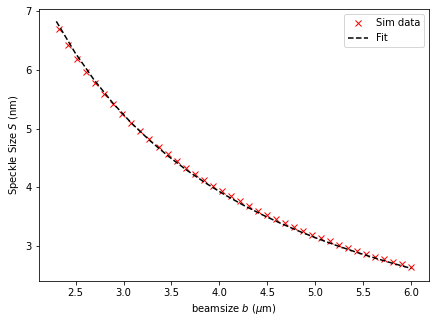

In [26]:
sigma_fit = []
for i in range(len(parameters)):
    sigma_temp = parameters[i][1]
    sigma_fit.append(sigma_temp)

FWHM = []      # in nm
FWHM_err = []  # in nm
for i in range(len(sigma)):
    FWHM.append(2.355*parameters[i][1]*2)    # multiple by 2 because of detector-pixel resolution, in units of nm
    FWHM_err.append(2.355*perr[i]*2)
    
specklesize = (2.355*np.array(sigma_fit)/(np.sqrt(2))) * sample_pixel_size *  10**9     # nm
beamfwhm = 2.355*np.array(sigma_2d)
beamsize = beamfwhm * sample_pixel_size * 10**6       # microm

a = 15.7
b = 0
n = 1
fitx = np.linspace(2.3, 6, 20)
fity = (a * (1/fitx) + b) * n

plt.figure(figsize=(7, 5))
l, = plt.plot(beamsize, specklesize, 'x' ,color='red', label='Sim data')
plt.plot(fitx, fity, '--', color='black', label = "Fit")
plt.xlabel(r'beamsize $b$ ($\mu$m)')
plt.ylabel(r'Speckle Size $S$ (nm)')
plt.legend(loc="upper right")


plt.savefig('sim_speckle-beamsize.png')



In [27]:
xdata = l.get_xdata()
ydata = l.get_ydata()

In [29]:
ydata


array([6.69379563, 6.42755219, 6.18778455, 5.97011689, 5.77049178,
       5.58572589, 5.41351561, 5.25196953, 5.09966772, 4.95556559,
       4.81892489, 4.68885215, 4.56498645, 4.44700749, 4.33458288,
       4.22729118, 4.12495756, 4.02728658, 3.93402466, 3.84492471,
       3.75978982, 3.67824403, 3.60020487, 3.52536114, 3.45356588,
       3.38460348, 3.31835243, 3.25447696, 3.19302673, 3.13379535,
       3.07667521, 3.02164027, 2.9684472 , 2.91721642, 2.86773655,
       2.82001879, 2.77403878, 2.72975194, 2.6871841 , 2.64595888])

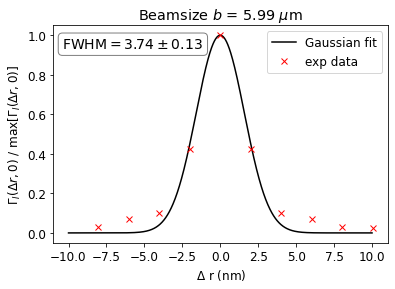

In [600]:
inspect = 39

beamsize_round = np.round(beamsize,2)
x_fit_nm = x_fit * sample_pixel_size * 10**9
x_v_nm = x_v[z1:z2] * sample_pixel_size * 10**9
chi2x = np.linspace(-5,5,10)

def chi2(o,e):
    
    emptylist = []
    
    for i in range(len(o)):
        
        chi2_temp = (((o[i] - e[i])**2 )/ e[i])
        #chi2_temp.append(chi2_ind)
        #print(chi2_temp)
        
        emptylist.append(chi2_temp)
    #chi2 = np.sum(chi2_ind)
    df = len(o) - 3            # two variables being fitted by gaussian.
    return sum(emptylist), df

o = y_cfit_norm[inspect][z1:z2]
e = gauss_pdf(chi2x, parameters[inspect][0], parameters[inspect][1])

chi2(o,e)

alpha = 0.05

ndf = chi2(o,e)[1]
c2 = chi2(o,e)[0]

plt.figure()

plt.plot(x_fit_nm, gauss_pdf(x_fit, parameters[inspect][0], parameters[inspect][1]), color = 'black', label='Gaussian fit')
plt.plot(x_v_nm, y_cfit_norm[inspect][z1:z2], 'x', color = 'red', label='exp data')

plt.title(r'Beamsize $b$ = {} $\mu$m'.format(beamsize_round[inspect]))
plt.xlabel(r'$\Delta$ r (nm)')
plt.ylabel(r'$\Gamma_I(\Delta r, 0)$ / max[$\Gamma_I(\Delta r,0)$] ')
plt.legend()

textstr = (r'FWHM$=%.2f \pm %.2f$' % (FWHM[inspect], FWHM_err[inspect])) #multiply by two to get nm scale. 
props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(-10.4, 0.99, textstr, fontsize=14,
        verticalalignment='top', bbox=props)

plt.savefig('../Report 3/1d_corr/1d_corr_plot{}.png'.format(inspect))

In [ ]:
()